First Step: Designing of the circuit is done!



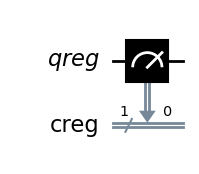

In [1]:
#We create a new quantum circuit with just one quantum and classical bit

#Importing the dependencies from qiskit
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit

#Defining the classical and quantum bits
q = QuantumRegister(1,"qreg") #only a single qubit
c = ClassicalRegister(1,"creg") 

"""Some facts:
1. To retrive the information of the quantum bit, it should be measured
2. The measurement is stored classically
3. Hence we need a classical register with classical bits

"""
#Defining the quantum circuit
qc = QuantumCircuit(q,c)

#Now measuring the qubit (defined by associating a quantum bit to classical bit)

qc.measure(q[0],c[0])

#Confirmation message 
print("First Step: Designing of the circuit is done!")

#Drawing the cirucit
print()
qc.draw(output = 'mpl')




{'0': 1024}


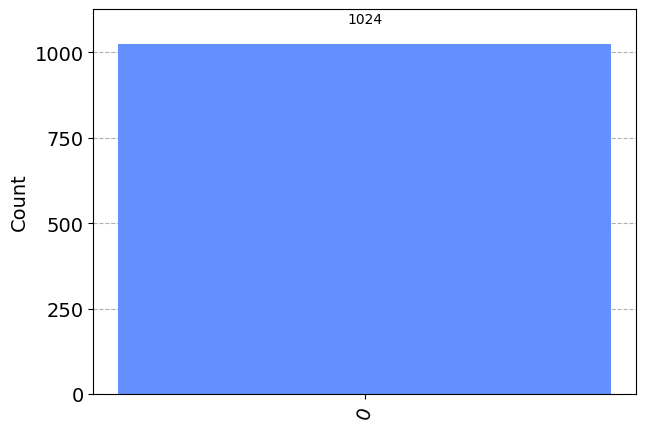

In [3]:
#The second step is to simulate the circuit which we have just created

#Importing the dependencies
from qiskit import execute, Aer

# we create a job object for execution of the circuit
# there are three parameters
#     1. mycircuit
#     2. backend on which it will be executed: we will use local simulator
#     3. how many times it will be executed, by default it is 1024

job = execute(qc, Aer.get_backend('qasm_simulator'), shots=1024)

# we can get the result of the outcome as follows
counts = job.result().get_counts(qc)
print(counts)

# We can also show the results in terms of Histogram
from qiskit.visualization import plot_histogram
plot_histogram(counts)

In [5]:
print(qc.qasm())
#It prints the qasm code of our circuit

OPENQASM 2.0;
include "qelib1.inc";
qreg reg_qreg[1];
creg reg_creg[1];
measure reg_qreg[0] -> reg_creg[0];



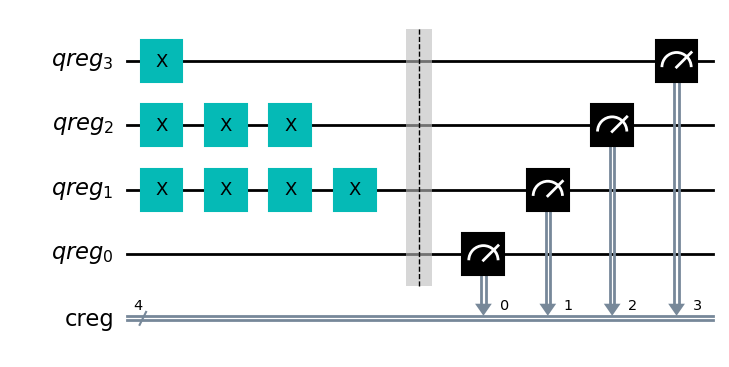

In [7]:
#Now we introduce more quantum bits and perform different operations in the circuit

from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer

#Defining the qubits and bits
q2 = QuantumRegister(4,"qreg")
c2 = ClassicalRegister(4,"creg")

#Defining the circuit
qc2 = QuantumCircuit(q2,c2)

# apply x-gate to the fourth quantum bit once
qc2.x(q2[3])

# apply x-gate to the third quantum bit three times
qc2.x(q2[2])
qc2.x(q2[2])
qc2.x(q2[2])

# apply x-gate to the second quantum bit four times
qc2.x(q2[1])
qc2.x(q2[1])
qc2.x(q2[1])
qc2.x(q2[1])

# define a barrier (for a better visualization)
qc2.barrier()

#Performing the measurement
qc2.measure(q2,c2)

#Drawing the circuit (With the reversed bits [Not Default])
qc2.draw(output = 'mpl', reverse_bits=True)



{'1100': 100}


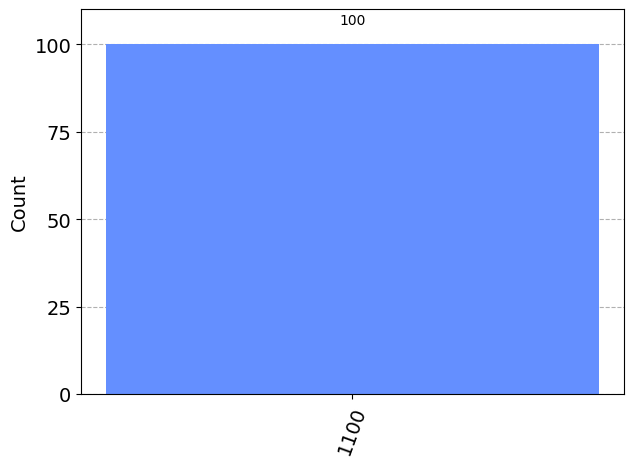

In [8]:
#Now we will simulate the circuit
job = execute(qc2, Aer.get_backend('qasm_simulator'), shots = 100)
counts = job.result().get_counts(qc2)

#Priniting the result
print(counts)

#In terms of histogram
from qiskit.visualization import plot_histogram
plot_histogram(counts)